# Introduction 
Name: Sifra Hilda Juliana Siregar

Objectives: This program is designed to perform an analysis of the Airbnb dataset in Amsterdam, focusing on common properties and the distribution of property prices.

## Business Understanding

Specific:

> Understand specific characteristics, especially pricing, of Airbnb listings in Amsterdam.

Measurable:

> Use statistical tests to measure significance in the relationship between relevant variables.
> Calculate descriptive statistics such as mean, median, and distribution for various variables.

Achievable:

> All questions and parameters can be addressed with the available dataset.

Relevant:

> The analysis results provide valuable information for property owners to set competitive prices, prospective guests to choose properties based on preferences, and market analysts to comprehend market trends.

Time-Bound:

> This analysis will be completed within a specified timeframe.

*Problem Statement*:

How can we comprehend pricing patterns, guest preferences, and factors influencing satisfaction levels in the Amsterdam Airbnb market?

### Breaking Down the Problem

In analyzing the selected dataset, I will use 6 questions to break down the problem for easier analysis.

**1.**
What type of property is most common among the top 10 property types in the Amsterdam Airbnb dataset, and what percentage does it represent of the total top property types?

**2:** 
How does the difference between the mean and median affect the interpretation of the property price distribution?

**3:**
What is the distribution of rating scores among the top 10 property types?

**4:**
Which areas have the highest and lowest average property prices?

**5:**
Based on the average rental prices according to the number of bedrooms in this dataset, is there a price trend with an increasing number of bedrooms?

**6:** 
Is the correlation between price and review_scores_rating statistically significant?

**7:** 
Are there significant price changes between properties hosted by superhosts and those not hosted by superhosts?


## Data Loading

In [ ]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from scipy.stats import pearsonr

In [ ]:
# supressing warnings
warnings.filterwarnings('ignore')

In [ ]:
#read csv 
df=pd.read_csv ('listingsair.csv')

In [ ]:
#show data shape
df.shape

(6173, 44)

In [ ]:
#show data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6173 entries, 0 to 6172
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6173 non-null   int64  
 1   last_scraped                                  6173 non-null   object 
 2   host_id                                       6173 non-null   int64  
 3   host_since                                    6173 non-null   object 
 4   host_response_time                            4692 non-null   object 
 5   host_is_superhost                             6173 non-null   object 
 6   host_listings_count                           6173 non-null   int64  
 7   host_total_listings_count                     6173 non-null   int64  
 8   host_identity_verified                        6173 non-null   object 
 9   neighbourhood_cleansed                        6173 non-null   o

In [ ]:
#show data head
df 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.head()


,id,last_scraped,host_id,host_since,host_response_time,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,23726706,2022-06-05,122619127,2017-03-26,within an hour,f,1,1,t,IJburg - Zeeburgereiland,Private room in home,Private room,2,1 shared bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Dishes and silverwa...",88.0,2,14,2.0,2.0,1125.0,1125.0,2.0,1125.0,t,0,6,20,66,78,11,3,2018-03-26,2022-05-29,4.99,4.87,t,1,0,1,0,1.53
1,35815036,2022-06-05,269425139,2019-06-18,within an hour,t,1,1,t,Noord-Oost,Tiny home,Entire home/apt,2,1.5 baths,NaN,1.0,"[""Carbon monoxide alarm"", ""Dishes and silverwa...",105.0,3,100,1.0,3.0,1125.0,1125.0,3.0,1125.0,t,4,6,12,243,95,36,6,2019-06-26,2022-06-02,4.96,4.83,f,1,1,0,0,2.65
2,31553121,2022-06-05,76806621,2016-06-09,within an hour,f,1,1,t,Noord-West,Entire guesthouse,Entire home/apt,4,1 bath,1.0,3.0,"[""Dishwasher"", ""Carbon monoxide alarm"", ""Ether...",152.0,2,60,2.0,2.0,1125.0,1125.0,2.0,1125.0,t,0,3,3,3,82,26,1,2019-02-04,2022-05-29,4.74,4.59,f,1,1,0,0,2.02
3,34745823,2022-06-05,238083700,2019-01-21,within an hour,f,3,3,t,Gaasperdam - Driemond,Entire rental unit,Entire home/apt,2,1 bath,1.0,2.0,"[""Essentials"", ""Smoke alarm"", ""Host greets you...",87.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,t,5,20,26,290,39,4,0,2019-06-14,2022-04-17,4.87,4.90,f,3,3,0,0,1.08
4,44586947,2022-06-05,360838688,2020-08-06,within a few hours,t,0,0,f,Gaasperdam - Driemond,Private room in home,Private room,4,1 shared bath,2.0,3.0,"[""Dishwasher"", ""Body soap"", ""Microwave"", ""Baki...",160.0,2,31,2.0,2.0,31.0,31.0,2.0,31.0,t,9,32,62,152,15,12,3,2020-08-16,2022-05-29,5.00,4.80,f,1,0,1,0,0.68


For the case study that I will analyze, I do not need several columns below as they are *not relevant*:

'last_scraped', 'host_listings_count', 'minimum_minimum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'host_response_time', 'accommodates', 'bathrooms_text', 'amenities', 'instant_bookable', 'reviews_per_month', 'has_availability', 'number_of_reviews_l30d', 'number_of_reviews_ltm', 'number_of_reviews_l30d'

The analysis has also been filtered for the years 2019-2022 based on the 'first_review' and 'last_review' columns.

## Data Cleaning

In [ ]:
#drop columns
df =df.drop(columns=['last_scraped', 'host_listings_count', 'minimum_minimum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'host_response_time', 'accommodates', 'bathrooms_text', 'amenities', 'instant_bookable', 'reviews_per_month', 'has_availability', 'number_of_reviews_l30d', 'number_of_reviews_ltm', 'number_of_reviews_l30d'])


In [ ]:
#change data type
df['host_since'] = pd.to_datetime(df['host_since'])
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])


print(df['host_since'].dtype)
print(df['first_review'].dtype)
print(df['last_review'].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]


In [ ]:
#change input column
df['host_is_superhost'] = df['host_is_superhost'].replace({'t': True, 'f': False})

In [ ]:
#change data type
df['host_is_superhost'] = df['host_is_superhost'].astype(bool)
df['host_identity_verified'] = df['host_identity_verified'].astype(bool)


print(df['host_is_superhost'].dtype)
print(df['host_identity_verified'].dtype)

bool
bool


In [ ]:
#show duplicated data on 'id'
df['id'].duplicated().sum()

452

In [ ]:
#removing the duplicated data from the 'id' column and determining the count
df = df.drop_duplicates(subset = 'id')

In [ ]:
#removing missing values in the 'review_scores_rating' and 'review_scores_value' columns
df= df.dropna(subset = ['review_scores_rating', 'review_scores_value'])

In [ ]:
#removing data with a value of 0 in the 'host_total_listings_count' column
df = df[df['host_total_listings_count'] != 0]

In [ ]:
#Filtering data for 'first_review' and 'last_review' from the year 2019
df = df[(df['first_review'].dt.year >= 2019) |(df['first_review'].isna())]
df = df[(df['last_review'].dt.year >= 2019) | (df['last_review'].isna())]

## Analisa dan Perhitungan

### GRAPH 1 (PIE CHART) 
The analysis conducted after data preparation involves examining the top 10 most frequent properties in the dataset.

In [ ]:
#calculating the number of properties based on property type:
property_type_counts= df['property_type'].value_counts()[0:10]
property_type_counts

property_type
Entire rental unit                   469
Private room in rental unit          107
Entire home                          100
Private room in bed and breakfast     84
Entire condo                          76
Room in hotel                         62
Room in boutique hotel                61
Entire serviced apartment             60
Private room in home                  40
Entire loft                           35
Name: count, dtype: int64

From the above data, it can be concluded that the most common property type in the list is 'Entire rental unit' with a count of 469. Below is a pie chart representing the percentage distribution of the top 10 property types on Airbnb in Amsterdam.

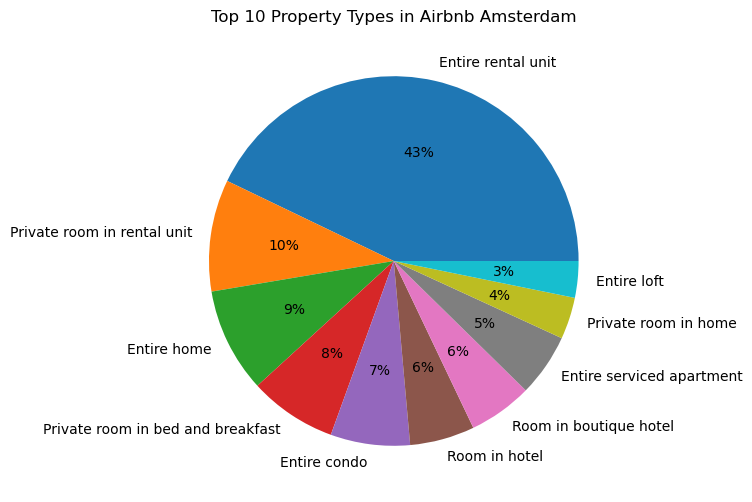

In [ ]:
#create a pie char
plt.figure(figsize=(6, 6))
plt.pie(property_type_counts, labels= property_type_counts.index, autopct='%1.0f%%', startangle=0)
plt.title('Top 10 Property Types in Airbnb Amsterdam')
plt.show()

### Descriptive Statistics

Can perform an analysis to find the average (mean) and middle value (median) of property prices for different types of properties

In [ ]:
#top 10 property types
top_10_types = df['property_type'].value_counts().index[:10]

top_10_types

Index(['Entire rental unit', 'Private room in rental unit', 'Entire home',
       'Private room in bed and breakfast', 'Entire condo', 'Room in hotel',
       'Room in boutique hotel', 'Entire serviced apartment',
       'Private room in home', 'Entire loft'],
      dtype='object', name='property_type')

In [ ]:

#combining groups by calculating the mean and median for the top 10 property types.
result = df[df['property_type'].isin(top_10_types)].groupby('property_type')['price'].agg(['mean', 'median'])

#result
result_sorted = result.sort_values(by='mean', ascending=False)

result_sorted

,mean,median
property_type,,
Entire serviced apartment,348.933333,297.5
Room in boutique hotel,320.758632,242.0
Entire home,241.270000,179.5
Room in hotel,228.423816,209.5
Entire loft,223.571429,192.0
Entire condo,213.973684,182.5
Entire rental unit,203.803838,180.0
Private room in bed and breakfast,174.964286,158.5
Private room in rental unit,124.205607,108.0


The results indicate a significant variation in prices among different property types, with some properties having much higher prices than others, causing a right-skewed distribution of prices.

### GRAPH 2 (BOXPLOT)

With this dataset, we can also analyze the top 10 property types with the highest rating scores by grouping and calculating the average review scores.

In [ ]:
property_type_mean = df.groupby('property_type')['review_scores_rating'].mean().sort_values(ascending=False)[0:10]
print(property_type_mean)

property_type
Camper/RV                       5.000000
Tent                            5.000000
Entire place                    4.986667
Private room in nature lodge    4.960000
Shared room in rental unit      4.950000
Private room in farm stay       4.920000
Room in bed and breakfast       4.915714
Farm stay                       4.910000
Private room in townhouse       4.906471
Entire cabin                    4.900000
Name: review_scores_rating, dtype: float64


From the above results, it can be seen that Camper/RV has the highest rating score with a value of 5.0. With this rating score, it can be concluded that guests can benefit in choosing a property type according to their preferences. Below are the results obtained and visualized in a BOXPLOT.

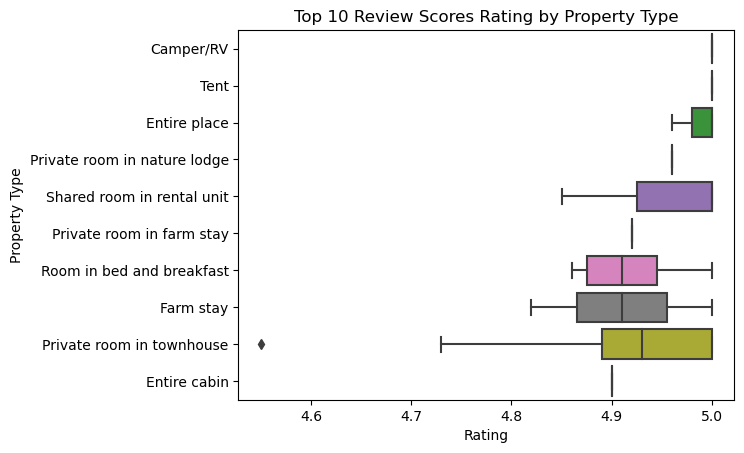

In [ ]:
sns.boxplot(x = "review_scores_rating", y = "property_type", data = df, order = df.groupby("property_type")["review_scores_rating"].mean().sort_values(ascending=False).index[0:10])
plt.xlabel('Rating')
plt.ylabel('Property Type')
plt.title('Top 10 Review Scores Rating by Property Type')
plt.show()

### GRAPH 3 (BAR CHAR)

In [ ]:
#show the unique values in the 'neighbourhood_cleansed' column.
df["neighbourhood_cleansed"].unique()

array(['Noord-Oost', 'Noord-West', 'Gaasperdam - Driemond',
       'Watergraafsmeer', 'IJburg - Zeeburgereiland',
       'Geuzenveld - Slotermeer', 'Westerpark', 'Buitenveldert - Zuidas',
       'Oud-Noord', 'Centrum-Oost', 'De Baarsjes - Oud-West',
       'Slotervaart', 'De Pijp - Rivierenbuurt', 'Zuid', 'Oud-Oost',
       'Oostelijk Havengebied - Indische Buurt', 'Centrum-West',
       'Bos en Lommer', 'De Aker - Nieuw Sloten', 'Bijlmer-Centrum',
       'Osdorp', 'Bijlmer-Oost'], dtype=object)

Based on the results from the above data, we can find the coordinates of each area to create a heatmap on the dashboard. Below are the latitude and longitude results

In [ ]:
#Mmapping each area based on coordinate points.

coordinates_dict = {
    'Noord-Oost': (52.4009, 4.9350),
    'Noord-West': (52.4100, 4.8950),
    'Gaasperdam - Driemond': (52.3069, 4.9881),
    'Watergraafsmeer': (52.3490, 4.9410),
    'IJburg - Zeeburgereiland': (52.3590, 4.9740),
    'Geuzenveld - Slotermeer': (52.3770, 4.8280),
    'Westerpark': (52.3860, 4.8740),
    'Buitenveldert - Zuidas': (52.3330, 4.8730),
    'Oud-Noord': (52.3900, 4.9170),
    'Centrum-Oost': (52.3670, 4.9150),
    'De Baarsjes - Oud-West': (52.3650, 4.8700),
    'Slotervaart': (52.3570, 4.8330),
    'De Pijp - Rivierenbuurt': (52.3510, 4.8960),
    'Zuid': (52.3450, 4.8760),
    'Oud-Oost': (52.3600, 4.9210),
    'Oostelijk Havengebied - Indische Buurt': (52.3650, 4.9410),
    'Centrum-West': (52.3720, 4.8910),
    'Bos en Lommer': (52.3790, 4.8490),
    'De Aker - Nieuw Sloten': (52.3450, 4.8050),
    'Bijlmer-Centrum': (52.3120, 4.9470),
    'Osdorp': (52.3550, 4.7980),
    'Bijlmer-Oost': (52.3230, 4.9600)
}

# create new columns 
df['latitude'] = df['neighbourhood_cleansed'].map(lambda x: coordinates_dict.get(x, (None, None))[0])
df['longitude'] = df['neighbourhood_cleansed'].map(lambda x: coordinates_dict.get(x, (None, None))[1])

#show the new columns
df[['neighbourhood_cleansed', 'latitude', 'longitude']].head()

,neighbourhood_cleansed,latitude,longitude
1,Noord-Oost,52.4009,4.9350
2,Noord-West,52.4100,4.8950
3,Gaasperdam - Driemond,52.3069,4.9881
9,Noord-Oost,52.4009,4.9350
11,Watergraafsmeer,52.3490,4.9410


It can also calculate the average prices for each area within the top ten regions.

In [ ]:
#calculating the average prices for the top ten regions.
neighborhood_price_stats = df.groupby('neighbourhood_cleansed')['price'].mean()[0:10].sort_values(ascending=False)
neighborhood_price_stats

neighbourhood_cleansed
Centrum-Oost               283.360902
Centrum-West               248.566263
Buitenveldert - Zuidas     209.432432
De Pijp - Rivierenbuurt    204.698212
De Baarsjes - Oud-West     201.406417
Bos en Lommer              199.600000
De Aker - Nieuw Sloten     186.620690
Bijlmer-Oost               166.250000
Bijlmer-Centrum            164.909091
Gaasperdam - Driemond       88.869565
Name: price, dtype: float64

The average property prices tend to be higher in the 'Centrum-Oost' and 'Centrum-West' areas, while 'Gaasperdam - Driemond' has the lowest prices. This indicates a variation in property prices based on geographical location, with the city center having higher prices than suburban areas. With the above data results, the conclusion can be visualized using a Bar Chart as shown below:

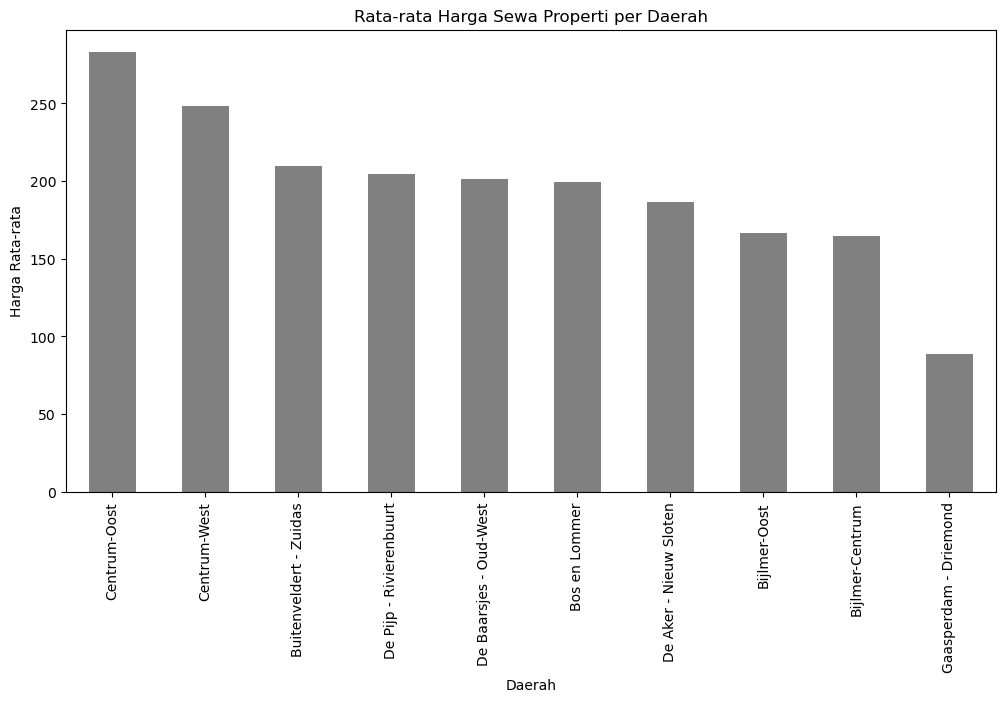

In [ ]:
#create bar char
plt.figure(figsize=(12, 6))
neighborhood_price_stats.plot(kind='bar', color='gray')
plt.title('Rata-rata Harga Sewa Properti per Daerah')
plt.xlabel('Daerah')
plt.ylabel('Harga Rata-rata')
plt.xticks(rotation=90)
plt.show()

### 4. LINE GRAPH

This analysis can also be extended to calculate average prices based on the number of bedrooms by grouping the data.

In [ ]:
#calculating the average prices based on the number of bedrooms
price_by_bedrooms = df.groupby('bedrooms')['price'].mean()
price_by_bedrooms

bedrooms
1.0     176.869565
2.0     247.083582
3.0     318.096774
4.0     306.181818
5.0     364.800000
6.0     175.000000
10.0    739.500000
Name: price, dtype: float64

The data above indicates that the average price increases with the number of bedrooms, reaching its peak at 10 bedrooms, showing a trend of price increase with an increasing number of bedrooms. Below is a line graph to visualize the data as described:

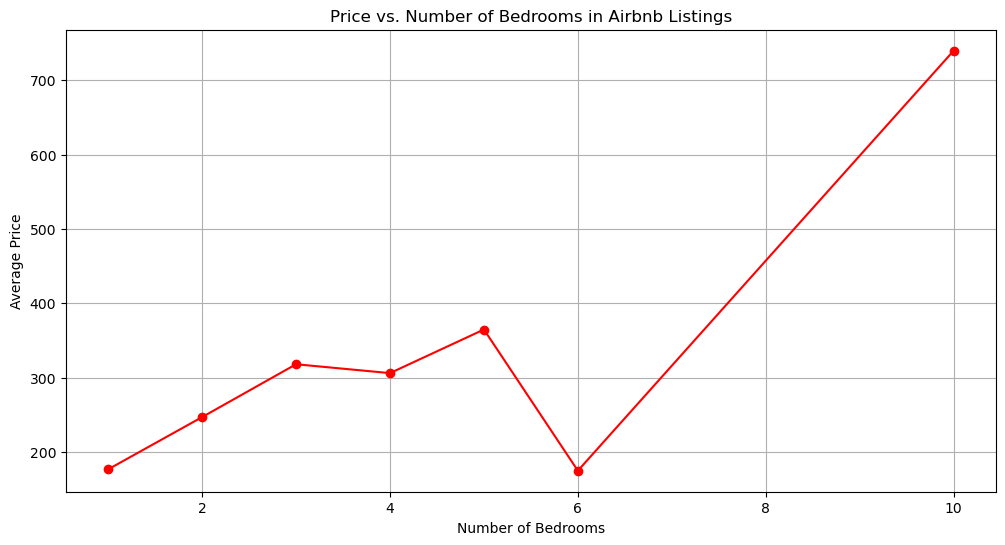

In [ ]:
#creating a Line Graph for the average prices based on the number of bedrooms.
plt.figure(figsize=(12, 6))
plt.plot(price_by_bedrooms.index, price_by_bedrooms.values, marker='o', color='red')
plt.title('Price vs. Number of Bedrooms in Airbnb Listings')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

### Descriptive Statistics

From this dataset, you can also check the correlation between price and review score rating.

In [ ]:
#calculating the correlation between price and review score rating
correlation, p_value = pearsonr(df['price'], df['review_scores_rating'])

print(f"Korelasi antara price dan review_scores_rating: {correlation:.2f}")
print(f"P-Value: {p_value:.6f}")

Korelasi antara price dan review_scores_rating: -0.04
P-Value: 0.114112


With the above results, there is no strong or significant relationship between price and the rating scores given by guests.

### Inferential Statistics

Next, we can analyze whether the superhost_group and non_superhost_group have an influence on price comparisons.

H0 (Null Hypothesis): There is no significant difference in property prices between Superhosts and non-Superhosts.

H1 (Alternative Hypothesis): There is a significant difference in property prices between Superhosts and non-Superhosts.


In [ ]:

"split data"
superhost_group = df[df['host_is_superhost'] == True]
non_superhost_group = df[df['host_is_superhost'] == False]

"test hypothesis"
t_statistic, p_value = stats.ttest_ind(superhost_group['price'], non_superhost_group['price'])

"significant level"
alpha = 0.05


"t_statistic"
if p_value < alpha:
    print(f"Hasil uji hipotesis: Reject H0. (p-value = {p_value})")
else:
    print(f"Hasil uji hipotesis: Tidak dapat menolak H0. (p-value = {p_value})")


Hasil uji hipotesis: Tidak dapat menolak H0. (p-value = 0.15490331263861698)


In this analysis, there is no evidence to suggest that the prices of properties hosted by Superhosts differ significantly from the prices of properties not hosted by Superhosts.

In [ ]:
"create new data frame"
superhost_group['host']='super_host'
non_superhost_group['host']='non_superhost'
host_df = pd.concat([superhost_group, non_superhost_group])

## Conclusion


In the analysis of Airbnb data in Amsterdam, it can be concluded that:

- The most common property type is "Entire rental unit."

- "Camper/RV" has the highest rating score.

- The price distribution tends to be right-skewed, with prices varying based on property type, location, and the number of bedrooms.

- The correlation between price and rating score is weak, and being a Superhost does not significantly affect property prices.

Recommendations:

- Adjusting prices.

- Promoting properties with high rating scores.

- Focusing on high-performing areas.

- Continuous market monitoring.

## Dashboard

In [ ]:
"save new dataset"
df.to_csv('milestonedshb.csv', index=False)

In [ ]:
"save new dataset"
host_df.to_csv('superhost_group.csv', index = False)

Link Tableau:

https://public.tableau.com/app/profile/sifra.siregar/viz/Milestone_1_SifraSiregar/Dashboard1?publish=yes
